## Clustering Using REpresentatives (CURE)

Clustering is useful in data mining and statistical data analysis for grouping similar data points together and identifying patterns in distributions.

The majority of clustering algorithms work well for spherical objects, but break down when there are outliers in the dataset. One way to deal with these outliers is to use CURE clustering, a more robust method for classifying datasets with large differences in size or with outliers. 

In CURE clustering, each cluster is represented by a certain number of representative points. These points are chosen by taking the the most scattered points in each cluster and shrinking them towards the cluster centre by a fixed amount, known as the compression.

Below a kd-tree is used in order to store the representative points of each cluster.

### Requirements

The technical dependencies required to run this notebook are as follows:

    - embedPy
    - Matplotlib 2.1.1
    - PyClustering (data samples used below)

### Loading CURE

The CURE algorithm is contained in `cure.q` and loads in the script `kdtree.q` to create the kd-tree.

In [1]:
\l ../cure.q
plt:.p.import[`matplotlib]`:pyplot;

The below creates an image with 4 different clusters, where `datapts` controls how many data points the shape has. This dataset has been used as most clustering algorithms which do not use representative points and compression would struggle to correctly classify different clusters which share the same centre.

In [2]:
datapts:2000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
d1:data

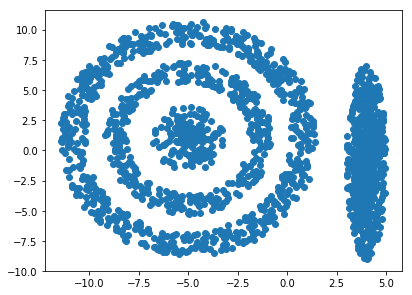

In [3]:
plt[`:scatter][;]. flip d1;
plt[`:show][];

The function `.kd.cure.cure` will run the CURE clustering process on a sample of data. The function takes four inputs: `sample` - data to be clustered, `numR` - the maximum number of representative points in each cluster, `com` - value between 0 and 1 which represents the amount of compression to apply to each representative point, and `numCl` - number of clusters to split the data in to. The function will return a list of the points in each cluster.

In the example below, 30 representative points are used with 0 compression in order to select 4 clusters.

In [4]:
show r1:.clust.cure.cure[d1;30;0;4]

(3.014178 -1.99424;3.045217 -2.157578;3.371607 -6.865941;4.377193 2.871082;3...
(-3.151933 6.377511;-3.296462 6.580874;-8.434739 -2.497548;-8.167609 -2.54607..
(-0.2283514 7.546626;-0.1099925 7.283108;0.08977569 5.624737;-3.236807 9.8201..
(-6.215421 -0.746208;-6.261899 -0.8750588;-5.933653 -0.9620186;-5.957072 -0.9..


To check that the data has been clustered correctly, the results can be re-plotted using `matplotlib.pyplot`, with each cluster represented with a different colour. 

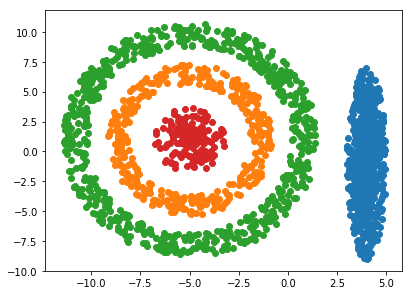

In [5]:
{plt[`:scatter][;]. flip x}each r1;
plt[`:show][];

### Adding compression

The following example shows how clustering data can be improved by using compression, when the dataset contains outliers and clusters of various sizes. The dataset below has a number of points spread out from the clusters mutual centre which will cause problems if only a small number of representative points are used.

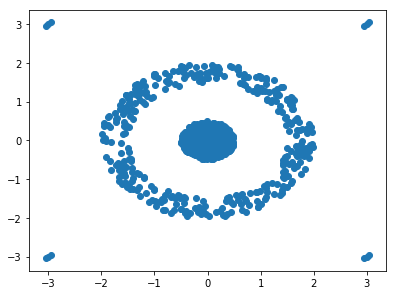

In [2]:
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample
d2:read[fcps`:SAMPLE_TARGET]`
plt[`:scatter][;]. flip d2;
plt[`:show][];

In [7]:
show r2:.clust.cure.cure[d2;5;0;6]

(1.839579 -0.74058;1.767341 -0.857799;1.77569 -0.008905;1.813554 -0.29039;1.8..
(-3 -3f;-3.05 -3.05;-2.95 -2.95)
(3 3f;3.05 3.05;2.95 2.95)
(-0.802996 1.327563;-0.984515 1.416244;0.10118 0.44625;0.131428 0.451591;0.36..
(-3 3f;-3.05 2.95;-2.95 3.05)
(3.05 -2.95;3 -3f;2.95 -3.05)


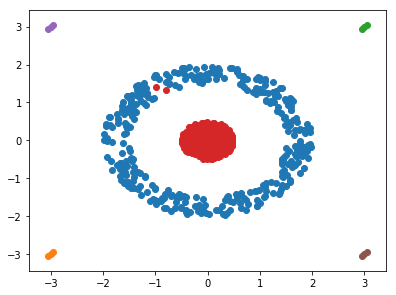

In [8]:
{plt[`:scatter][;]. flip x}each r2;
plt[`:show][];

The results show that the central cluster and the surrounding ring have not been classified correctly. This can be rectified by adding compression, which moves the representative points of each cluster towards its centre to deal with the varying shapes and outliers. Below a small compression of 0.1 is used.

In [9]:
show r2c:.clust.cure.cure[d2;5;0.1;6]

(-0.409523 0.155109;-0.345276 0.113582;-0.360913 0.130687;-0.333664 0.15261;-..
(-3 -3f;-3.05 -3.05;-2.95 -2.95)
(3 3f;3.05 3.05;2.95 2.95)
(1.966156 -0.097967;1.932207 -0.111536;1.984337 -0.179929;1.77569 -0.008905;1..
(-3 3f;-3.05 2.95;-2.95 3.05)
(3.05 -2.95;3 -3f;2.95 -3.05)


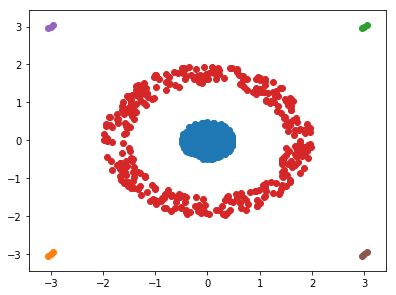

In [10]:
{plt[`:scatter][;]. flip x}each r2c;
plt[`:show][];

## Higher dimenion clustering

CURE clustering also works for datasets of higher dimenions, as shown below. 

In [11]:
d3:read[fcps`:SAMPLE_CHAINLINK]`

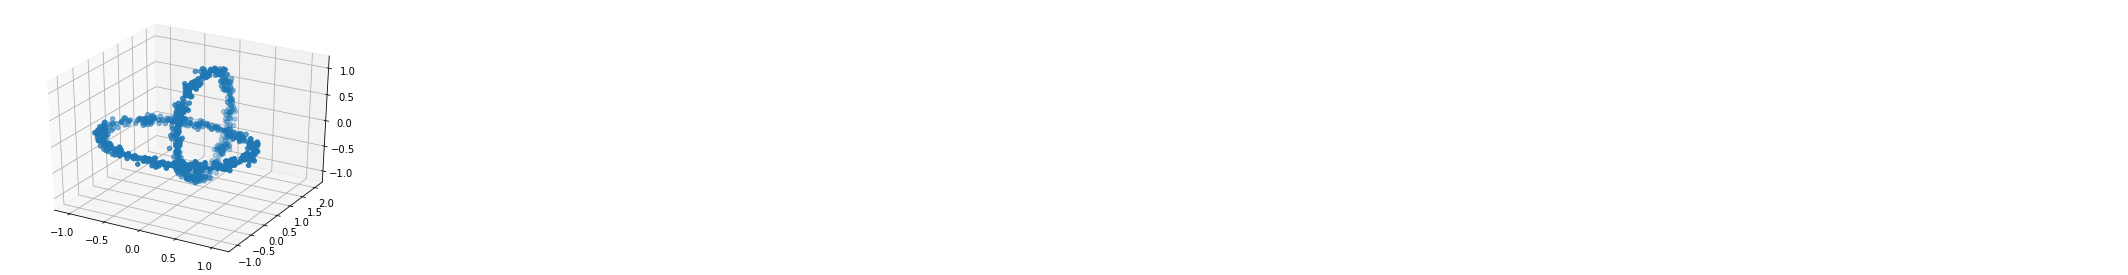

In [12]:
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d3;
plt[`:show][];

In [13]:
show r3:.clust.cure.cure[d3;10;0.1;2]

-0.031668 -1.044972 0.010822  -0.020696 -1.079193 0.022949  -0.037043 -1.0005..
0.06846   0.108596  -0.573497 0.026197  0.082884  -0.573026 0.056108  0.13095..


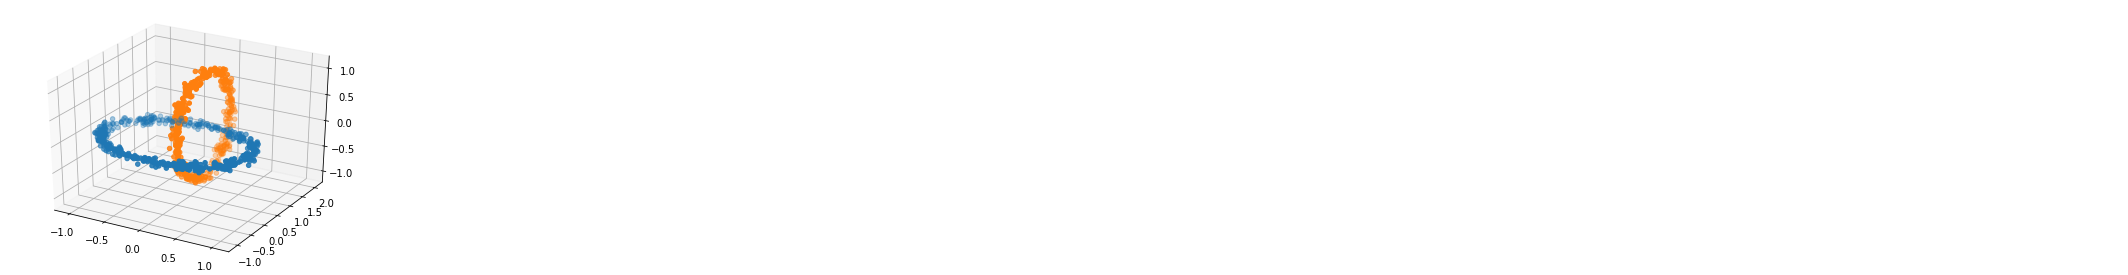

In [14]:
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each r3;
plt[`:show][];